In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Survival regression

In [3]:
from lifelines.datasets import load_rossi

rossi = load_rossi()
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [4]:
rossi.shape

(432, 9)

# Cox's proportional hazard model
$$h\left(t|x\right)=b_0\left(t\right)exp\bigg(\sum_{i=1}^{n}{b_i\left(x_i-\bar{x_i}\right)}\bigg)$$

In [7]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest', show_progress=True)
cph.print_summary()

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -658.74766, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
number of subjects = 432
  number of events = 114
partial log-likelihood = -658.75
  time fit was run = 2019-08-20 07:59:46 UTC

---
      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
fin  -0.38      0.68      0.19           -0.75           -0.00                0.47                1.00
age  -0.06      0.94      0.02           -0.10           -0.01                0.90                0.99
race  0.31      1.37      0.31           -0.29            0.92                0.75                2.50
wexp -0.15      0.86      0.21           -0.57            0.27                0.57                1.30
mar  -0.43      0.65      0.38           -1.18            0

In [10]:
cph.predict_partial_hazard(rossi).values.ravel()

array([1.21912632, 3.23025008, 3.03105799, 0.48771188, 1.21402458,
       1.23865487, 0.57985289, 1.1107552 , 2.32724581, 1.29794575,
       0.8835124 , 0.4941195 , 2.23828594, 0.58703863, 1.82248085,
       0.8733737 , 3.0297976 , 1.81044501, 3.11579294, 0.75862937,
       1.68098936, 0.13322443, 0.58423268, 0.4125429 , 0.83855334,
       1.03761154, 0.61922794, 1.91747731, 1.32076914, 1.01404388,
       1.04965683, 1.09990091, 0.2510082 , 0.85023702, 1.35733482,
       0.97969276, 1.67954286, 1.04259498, 1.57551533, 0.9909423 ,
       0.6215368 , 1.03837589, 4.70783812, 1.48264271, 1.20528635,
       1.10436999, 3.62820145, 1.08508871, 0.46577579, 0.54576073,
       0.35428868, 0.79700938, 0.44876036, 2.34848207, 0.53483499,
       0.62632953, 0.40132419, 1.07527674, 0.8158617 , 0.57189723,
       2.76488416, 1.38944098, 1.95095178, 1.64549706, 1.31188332,
       0.71814528, 0.98053651, 0.8733737 , 0.66287876, 1.62330195,
       0.96733178, 1.55361259, 0.69409758, 1.05379055, 1.66313

In [11]:
cph.predict_survival_function(rossi, times=[5., 25., 50.])

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
5.0,0.988085,0.968739,0.970639,0.995216,0.988135,0.987895,0.994315,0.989139,0.977378,0.987320,...,0.989129,0.980101,0.980231,0.988875,0.994450,0.995909,0.985189,0.994319,0.990843,0.993039
25.0,0.875711,0.703521,0.718943,0.948291,0.876198,0.873851,0.938826,0.886104,0.776194,0.868229,...,0.886011,0.800471,0.801649,0.883492,0.940239,0.955622,0.847704,0.938870,0.903159,0.925566
50.0,0.725969,0.428038,0.451031,0.879752,0.726942,0.722254,0.858714,0.746932,0.542625,0.711092,...,0.746745,0.584487,0.586563,0.741632,0.861836,0.896252,0.671203,0.858810,0.782096,0.829740


In [12]:
cph.predict_median(rossi)

,0.5
0,inf
1,44.0
2,46.0
3,inf
4,inf
5,inf
6,inf
7,inf
8,inf
9,inf


In [25]:
import lifelines
lifelines.__version__

'0.22.3'

In [27]:
rossi = load_rossi()
censored_subjects = rossi.loc[~rossi['arrest'].astype(bool)] # 발현 X
censored_subjects_last_obs = censored_subjects['week']

In [28]:
cph.predict_partial_hazard(censored_subjects, conditional_after=censored_subjects_last_obs)

TypeError: predict_partial_hazard() got an unexpected keyword argument 'conditional_after'

In [29]:
cph.predict_survival_function(censored_subjects, times=[5., 25., 50.], conditional_after=censored_subjects_last_obs)

NotImplementedError: Sorry, conditional_after for Cox is tricky to do. It's not implemented yet.

In [30]:
cph.predict_median(censored_subjects, conditional_after=censored_subjects_last_obs)

TypeError: predict_median() got an unexpected keyword argument 'conditional_after'

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -658.74766, newton_decrement = 0.00000, seconds_since_start = 0.0Convergence completed after 5 iterations.


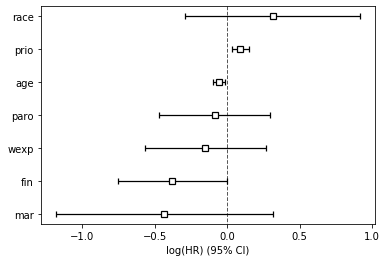

In [26]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi_dataset = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest', show_progress=True)

cph.plot()

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -658.74766, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.


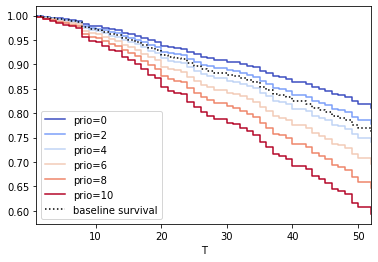

In [31]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi_dataset = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest', show_progress=True)

cph.plot_covariate_groups('prio', [0, 2, 4, 6, 8, 10], cmap='coolwarm')

In [33]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi_dataset = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi_dataset, 'week', event_col='arrest', strata=['race'], show_progress=True)

cph.print_summary()  # access the results using cph.summary

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -620.56361, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
            strata = ['race']
number of subjects = 432
  number of events = 114
partial log-likelihood = -620.56
  time fit was run = 2019-08-20 12:44:53 UTC

---
      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
fin  -0.38      0.68      0.19           -0.75           -0.00                0.47                1.00
age  -0.06      0.94      0.02           -0.10           -0.01                0.90                0.99
wexp -0.14      0.87      0.21           -0.56            0.27                0.57                1.32
mar  -0.44      0.64      0.38           -1.19            0.31                0.30                1.36
paro -0.09      0.92      0.2

In [34]:
from lifelines import CoxPHFitter

df = pd.DataFrame({
    'T': [5, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'E': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'weights': [1.1, 0.5, 2.0, 1.6, 1.2, 4.3, 1.4, 4.5, 3.0, 3.2, 0.4, 6.2],
    'month': [10, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'age': [4, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
})

cph = CoxPHFitter()
cph.fit(df, 'T', 'E', weights_col='weights', robust=True)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 12 observations, 3 censored>
      duration col = 'T'
         event col = 'E'
       weights col = 'weights'
   robust variance = True
number of subjects = 12
  number of events = 9
partial log-likelihood = -20.54
  time fit was run = 2019-08-20 12:45:03 UTC

---
        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
month  -3.34      0.04      0.12           -3.58           -3.09                0.03                0.05
age   -16.68      0.00      0.22          -17.11          -16.24                0.00                0.00

           z      p  -log2(p)
month -26.90 <0.005    526.87
age   -75.16 <0.005       inf
---
Concordance = 0.97
Log-likelihood ratio test = 46.45 on 2 df, -log2(p)=33.50


C:\Users\JinMH\Anaconda3\envs\keras\lib\site-packages\lifelines\utils\__init__.py:987: ConvergenceWarning: Column age has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression
  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\JinMH\Anaconda3\envs\keras\lib\site-packages\lifelines\fitters\coxph_fitter.py:568: ConvergenceWarning: Newton-Rhaphson convergence completed but norm(delta) is still high, 1.890. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?
  ConvergenceWarning,


In [35]:
df

,T,E,weights,month,age
0,5,1,1.1,10,4
1,3,1,0.5,3,3
2,9,1,2.0,9,9
3,8,1,1.6,8,8
4,7,1,1.2,7,7
5,4,1,4.3,4,4
6,4,0,1.4,4,4
7,3,0,4.5,3,3
8,2,1,3.0,2,2
9,5,1,3.2,5,5


In [36]:
from lifelines import CoxPHFitter

df = pd.DataFrame({
    'T': [5, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'E': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'month': [10, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'age': [4, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'id': [1, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6, 7]
})

cph = CoxPHFitter()
cph.fit(df, 'T', 'E', cluster_col='id')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 12 observations, 3 censored>
      duration col = 'T'
         event col = 'E'
       cluster col = 'id'
   robust variance = True
number of subjects = 12
  number of events = 9
partial log-likelihood = -2.77
  time fit was run = 2019-08-20 12:45:23 UTC

---
        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
month  -3.08      0.05      0.10           -3.27           -2.89                0.04                0.06
age   -15.40      0.00      0.30          -15.98          -14.82                0.00                0.00

           z      p  -log2(p)
month -31.09 <0.005    702.62
age   -51.99 <0.005       inf
---
Concordance = 0.97
Log-likelihood ratio test = 23.47 on 2 df, -log2(p)=16.93


C:\Users\JinMH\Anaconda3\envs\keras\lib\site-packages\lifelines\utils\__init__.py:987: ConvergenceWarning: Column age has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression
  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\JinMH\Anaconda3\envs\keras\lib\site-packages\lifelines\fitters\coxph_fitter.py:568: ConvergenceWarning: Newton-Rhaphson convergence completed but norm(delta) is still high, 1.890. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?
  ConvergenceWarning,


# The Weibull AFT model

In [37]:
from lifelines import WeibullAFTFitter
from lifelines.datasets import load_rossi

rossi_dataset = load_rossi()

aft = WeibullAFTFitter()
aft.fit(rossi_dataset, duration_col='week', event_col='arrest')

aft.print_summary(3)  # access the results using aft.summary

<lifelines.WeibullAFTFitter: fitted with 432 observations, 318 censored>
         event col = 'arrest'
number of subjects = 432
  number of events = 114
    log-likelihood = -679.917
  time fit was run = 2019-08-20 12:45:50 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
lambda_ fin         0.272     1.313     0.138           0.002           0.543               1.002               1.720
        age         0.041     1.042     0.016           0.009           0.072               1.009               1.075
        race       -0.225     0.799     0.220          -0.656           0.207               0.519               1.230
        wexp        0.107     1.112     0.152          -0.190           0.404               0.827               1.497
        mar         0.311     1.365     0.273          -0.224           0.847               0.799               2.332
        paro        0.059     1.061     0.140          -0.2

In [40]:
rossi_dataset.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [41]:
print(aft.median_survival_time_)
print(aft.mean_survival_time_)

100.32670070855555
118.67416351029551


In [44]:
aft = WeibullAFTFitter()

aft.fit(rossi, duration_col='week', event_col='arrest', ancillary_df=False)
# identical to aft.fit(rossi, duration_col='week', event_col='arrest', ancillary_df=None)


aft.fit(rossi, duration_col='week', event_col='arrest', ancillary_df=rossi)


aft.fit(rossi, duration_col='week', event_col='arrest', ancillary_df=True)
# identical to aft.fit(rossi, duration_col='week', event_col='arrest', ancillary_df=rossi)

aft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 432 observations, 318 censored>
         event col = 'arrest'
number of subjects = 432
  number of events = 114
    log-likelihood = -669.40
  time fit was run = 2019-08-20 12:47:14 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
lambda_ fin         0.24      1.28      0.15           -0.06            0.55                0.95                1.73
        age         0.10      1.10      0.03            0.04            0.16                1.04                1.17
        race        0.07      1.07      0.19           -0.30            0.44                0.74                1.55
        wexp       -0.34      0.71      0.15           -0.64           -0.04                0.53                0.96
        mar         0.26      1.30      0.30           -0.33            0.85                0.72                2.35
        paro        0.09      1.10      0.15           -0.21      

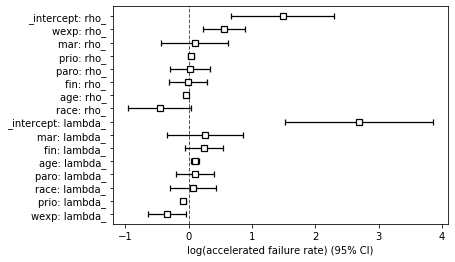

In [45]:
wft = WeibullAFTFitter().fit(rossi, 'week', 'arrest', ancillary_df=True)
wft.plot()

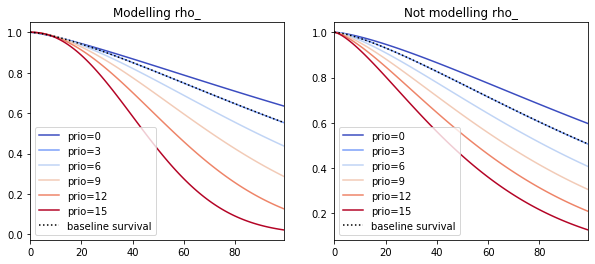

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

times = np.arange(0, 100)
wft_model_rho = WeibullAFTFitter().fit(rossi, 'week', 'arrest', ancillary_df=True, timeline=times)
wft_model_rho.plot_covariate_groups('prio', range(0, 16, 3), cmap='coolwarm', ax=ax[0])
ax[0].set_title("Modelling rho_")

wft_not_model_rho = WeibullAFTFitter().fit(rossi, 'week', 'arrest', ancillary_df=False, timeline=times)
wft_not_model_rho.plot_covariate_groups('prio', range(0, 16, 3), cmap='coolwarm', ax=ax[1])
ax[1].set_title("Not modelling rho_");

In [49]:
X = rossi.loc[:10]

print(aft.predict_cumulative_hazard(X, ancillary_df=X))
print(aft.predict_survival_function(X, ancillary_df=X))
print(aft.predict_median(X, ancillary_df=X))
print(aft.predict_percentile(X, p=0.9, ancillary_df=X))
print(aft.predict_expectation(X, ancillary_df=X))

            0         1             2         3             4         5   \
1.0   0.009571  0.001719  8.913352e-08  0.000056  5.490845e-07  0.000426   
2.0   0.017610  0.005211  2.810264e-06  0.000205  6.348885e-06  0.001360   
3.0   0.025156  0.009969  2.115602e-05  0.000439  2.657949e-05  0.002681   
4.0   0.032400  0.015795  8.860398e-05  0.000753  7.341009e-05  0.004340   
5.0   0.039427  0.022572  2.691094e-04  0.001145  1.614299e-04  0.006305   
6.0   0.046285  0.030217  6.670219e-04  0.001612  3.073300e-04  0.008556   
7.0   0.053007  0.038668  1.436948e-03  0.002153  5.296892e-04  0.011075   
8.0   0.059614  0.047878  2.793568e-03  0.002767  8.488170e-04  0.013848   
9.0   0.066121  0.057805  5.021424e-03  0.003452  1.286632e-03  0.016867   
10.0  0.072542  0.068418  8.484669e-03  0.004207  1.866562e-03  0.020120   
11.0  0.078886  0.079688  1.363679e-02  0.005031  2.613465e-03  0.023600   
12.0  0.085161  0.091590  2.103033e-02  0.005924  3.553557e-03  0.027300   
13.0  0.0913

In [50]:
churn_data = pd.read_csv(
    'https://raw.githubusercontent.com/treselle-systems/'
    'customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [53]:
churn_data.shape

(7043, 21)

In [55]:
churn_data.customerID.nunique()

7043